In [1]:
from google.colab import files
uploaded = files.upload()

Saving 1unb_bin.csv to 1unb_bin.csv


In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("1unb_bin.csv")  # Replace with the path to your dataset

# Extract features (X) and label (y)
X = data.iloc[:, 2:]  # Select columns from the 3rd column onwards
y = data.iloc[:, 1]   # Select the 2nd column as the label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, criterion='gini', min_samples_split=2, max_depth=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")


Accuracy: 0.99790


In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib.pyplot as plt

# Obtain the confusion matrix on the testing data
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy score on the testing data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation on the training data
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
print("Cross-Validation Scores:")
print(cv_scores)
print("Average Accuracy:", cv_scores.mean())


Confusion Matrix:
[[10600    31]
 [   73 38906]]
Accuracy: 0.9979036484579722
Cross-Validation Scores:
[0.9975812  0.99775388 0.99701957 0.99615567 0.99710596]
Average Accuracy: 0.9971232553133559


In [4]:
# Evaluate the model
accuracy_value = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred, digits=5)

# Print the results
print(f'Accuracy: {accuracy_value:.5f}')
print(f'Classification Report:\n{classification_report_str}')

Accuracy: 0.99790
Classification Report:
              precision    recall  f1-score   support

      Benign    0.99316   0.99708   0.99512     10631
   Malicious    0.99920   0.99813   0.99867     38979

    accuracy                        0.99790     49610
   macro avg    0.99618   0.99761   0.99689     49610
weighted avg    0.99791   0.99790   0.99791     49610



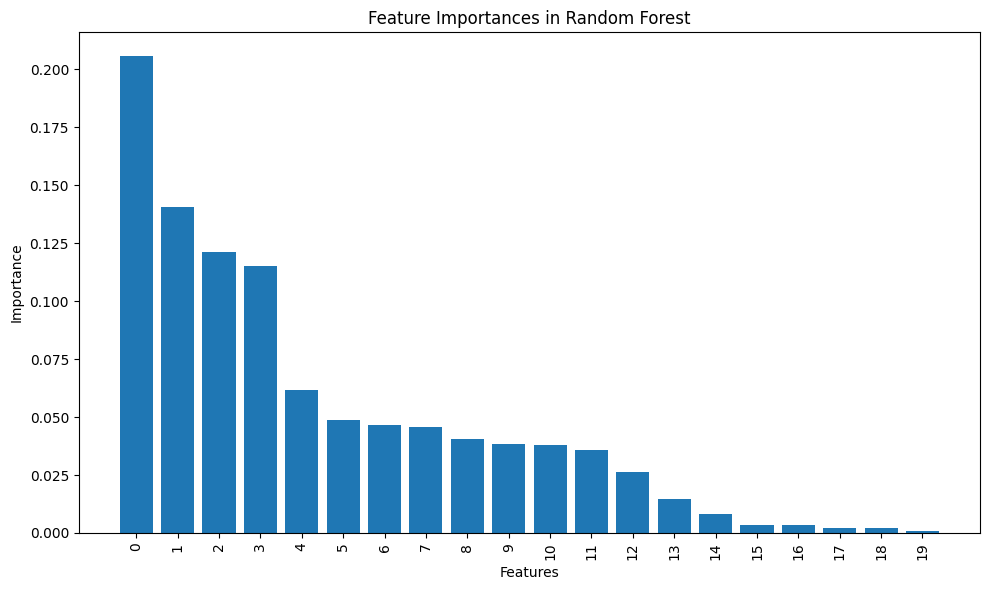

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Get the feature importances
importances = rf_classifier.feature_importances_

# Sort the feature importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_feature_names = [str(i) for i in range(X.shape[1])]  # Replace with your own feature names

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), sorted_importances, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.tight_layout()
plt.show()
